In [12]:
import numpy as np
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [2]:
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
x_train.shape

(60000, 28, 28)

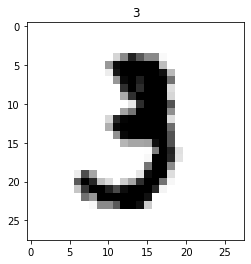

In [5]:
plt.title(y_train[10])
plt.imshow(x_train[10], cmap=plt.get_cmap('gray_r'))
plt.show()

In [48]:
def display_digit(num):
    label = y_test[num]
    image = x_test[num]
    plt.title('Example: {}  Label: {}'.format(num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

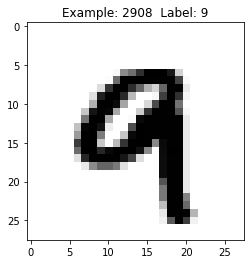

In [49]:
display_digit(2908)

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.0),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 720us/step - loss: 0.2766 - accuracy: 0.9217
Epoch 2/10
1875/1875 [==============================] - 1s 676us/step - loss: 0.1278 - accuracy: 0.9631
Epoch 3/10
1875/1875 [==============================] - 1s 683us/step - loss: 0.0902 - accuracy: 0.9723
Epoch 4/10
1875/1875 [==============================] - 1s 675us/step - loss: 0.0688 - accuracy: 0.9791
Epoch 5/10
1875/1875 [==============================] - 1s 739us/step - loss: 0.0540 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 1s 720us/step - loss: 0.0425 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 1s 684us/step - loss: 0.0345 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 1s 674us/step - loss: 0.0286 - accuracy: 0.9914
Epoch 9/10
1875/1875 [==============================] - 1s 679us/step - loss: 0.0234 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 1s 679u

In [ ]:
loss, acc = model.evaluate(x_test, y_test)
print("Loss = {}, accuracy = {}".format(loss, acc))

In [ ]:
loss, acc = model.evaluate(x_train, y_train)
print("Loss = {}, accuracy = {}".format(loss, acc))

In [35]:
class myarray(np.ndarray):
    def __new__(cls, *args, **kwargs):
        return np.array(*args, **kwargs).view(myarray)
    def index(self, value):
        return np.where(self == value)

[ 149  247  321  339  340  445  495  582  591  610  613  619  659  684
  691  720  740  844  846  947  951  956  965 1003 1014 1112 1114 1156
 1178 1194 1226 1232 1242 1247 1319 1326 1328 1364 1378 1393 1395 1494
 1500 1522 1549 1553 1581 1609 1717 1737 1754 1782 1790 1828 1901 1987
 2004 2016 2018 2035 2053 2070 2109 2118 2129 2182 2272 2293 2326 2329
 2369 2387 2395 2408 2414 2488 2514 2597 2607 2648 2654 2720 2771 2810
 2896 2907 2915 2921 2939 2953 2970 3073 3117 3129 3225 3289 3422 3474
 3503 3520 3558 3559 3567 3580 3597 3681 3727 3751 3776 3780 3808 3818
 3838 3853 3902 3939 3941 3943 3976 3985 4007 4065 4075 4078 4163 4199
 4201 4207 4224 4248 4289 4300 4355 4360 4384 4443 4497 4500 4534 4536
 4540 4551 4567 4601 4639 4723 4740 4807 4879 4880 4956 5078 5140 5201
 5331 5450 5457 5634 5642 5654 5655 5676 5734 5749 5874 5922 5926 5936
 5937 5955 5972 5973 5997 6011 6023 6042 6045 6059 6532 6555 6571 6574
 6576 6597 6598 6625 6651 6755 6783 6791 7216 7401 7432 7886 7902 7915
 7921 

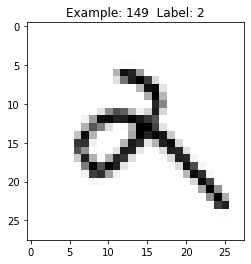

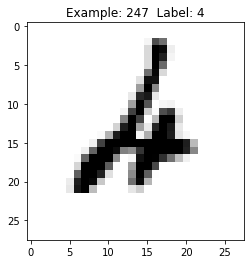

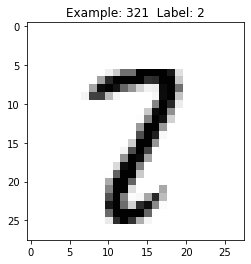

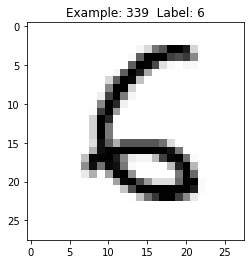

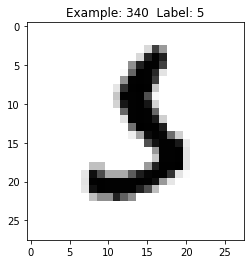

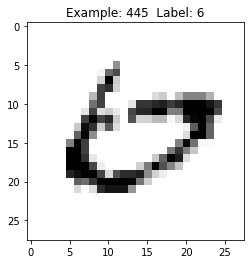

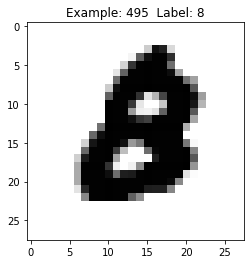

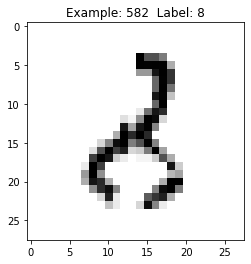

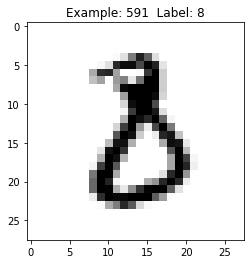

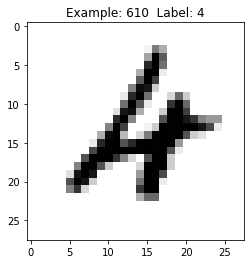

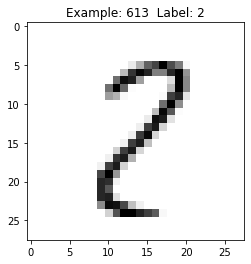

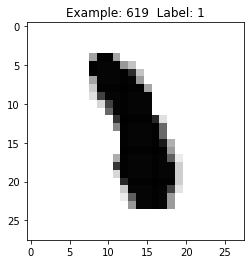

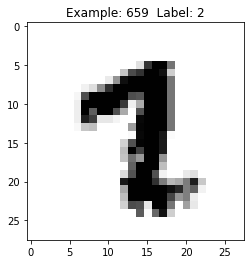

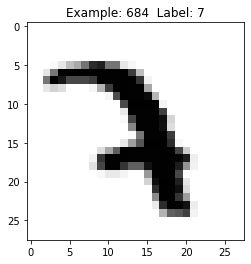

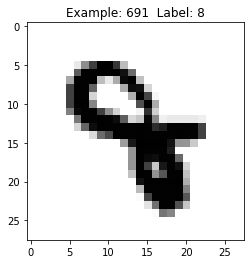

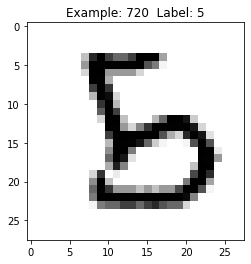

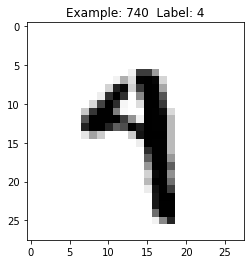

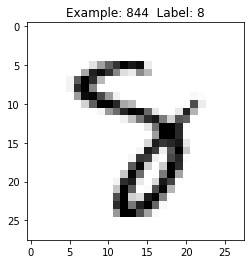

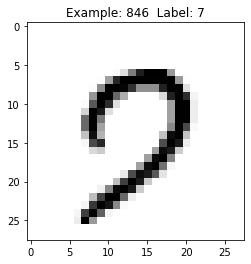

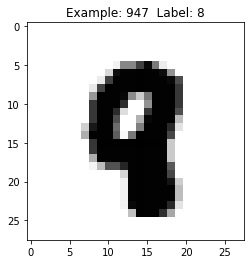

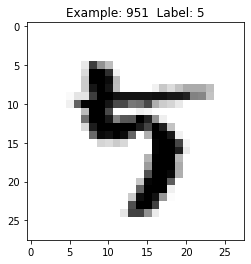

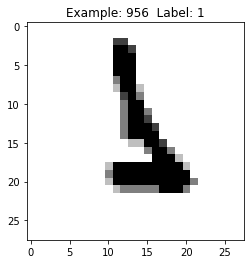

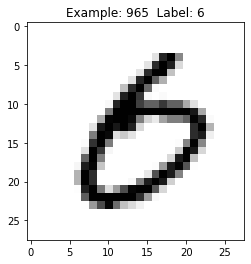

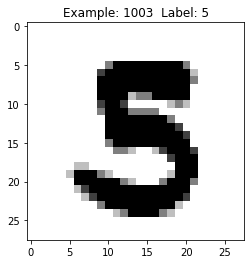

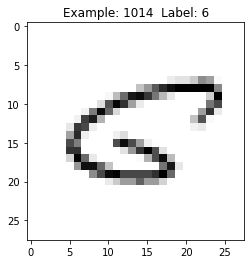

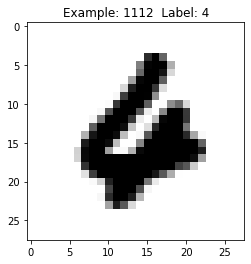

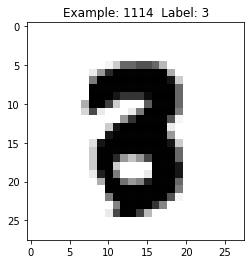

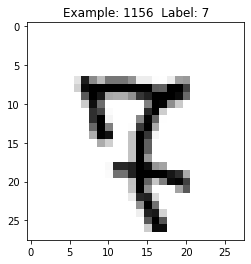

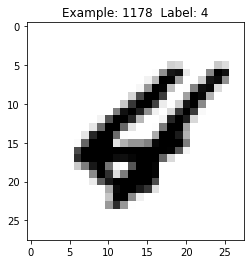

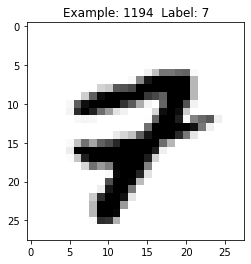

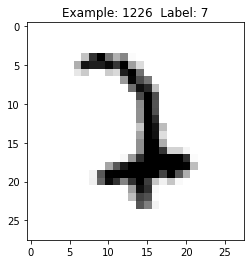

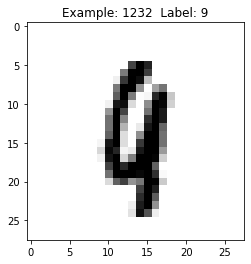

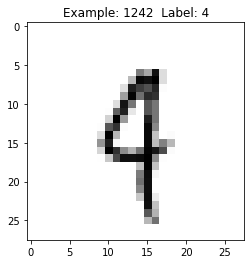

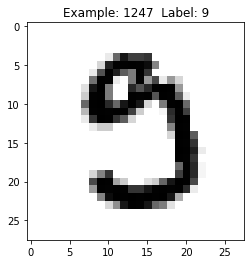

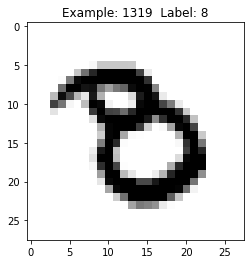

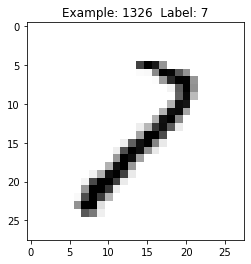

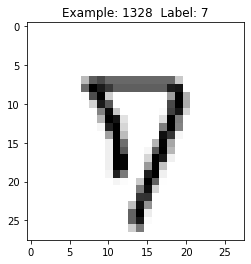

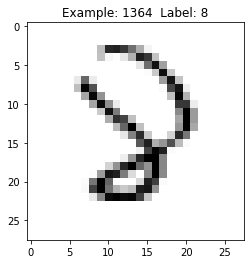

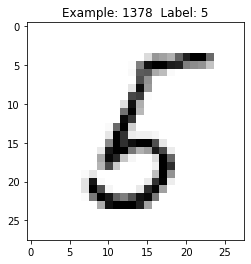

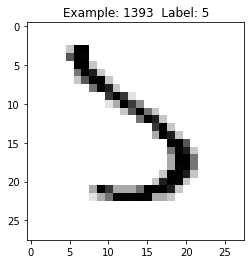

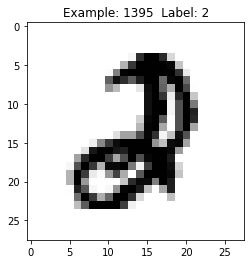

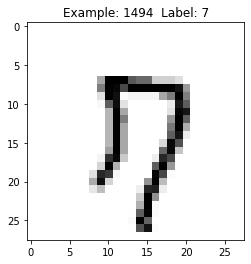

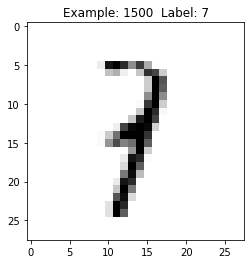

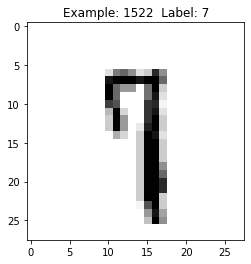

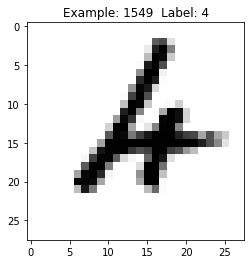

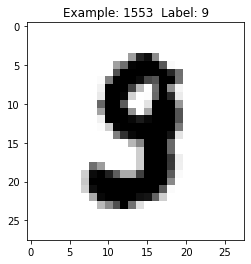

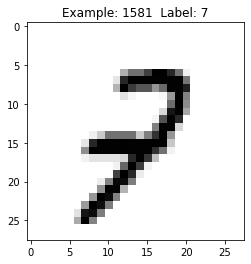

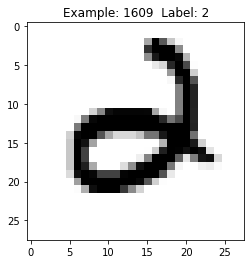

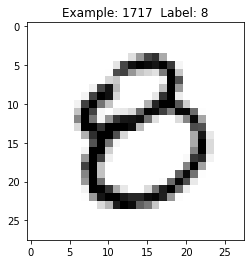

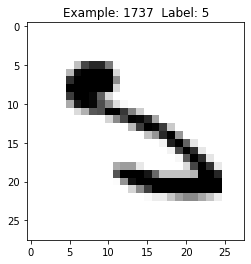

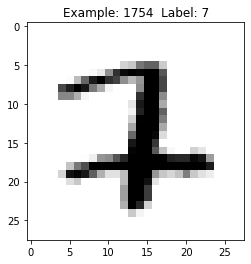

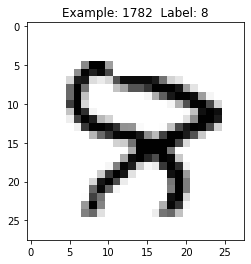

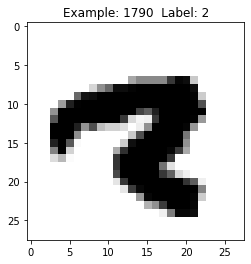

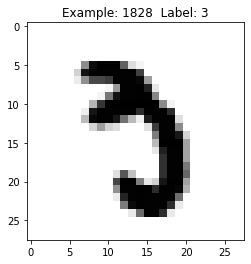

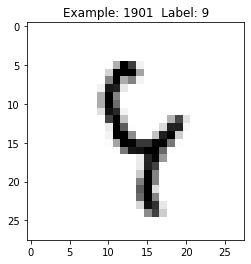

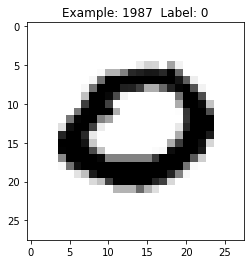

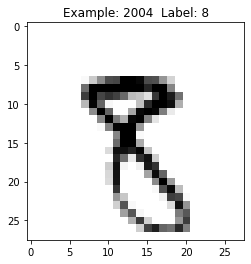

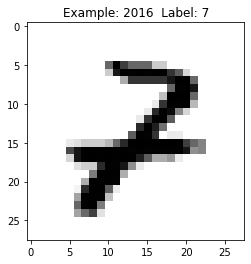

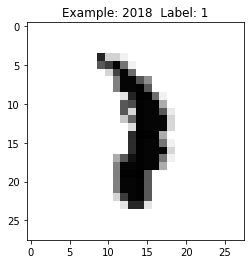

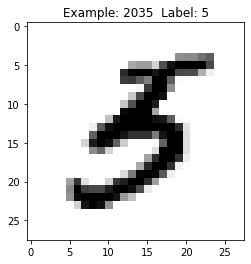

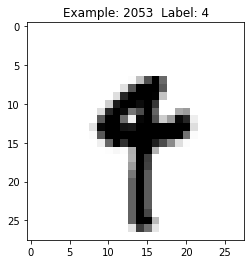

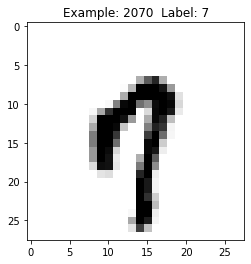

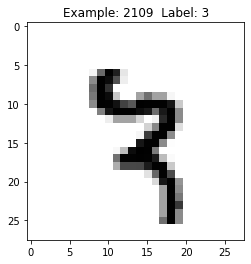

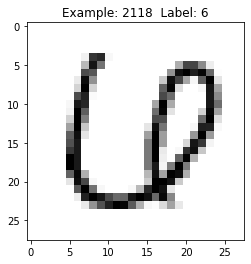

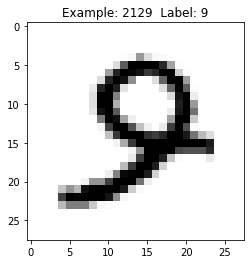

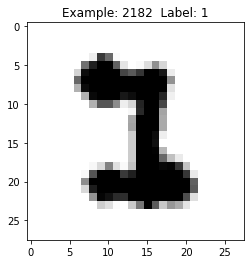

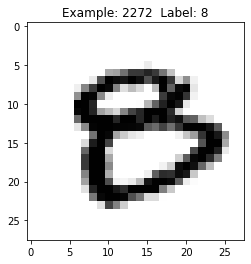

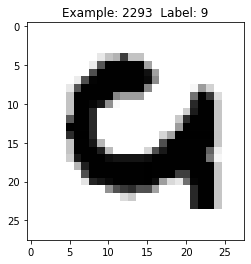

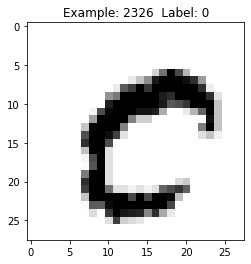

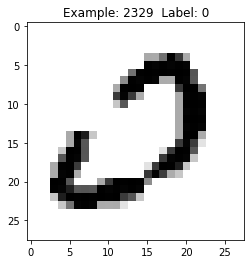

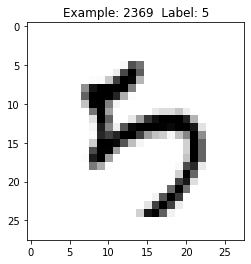

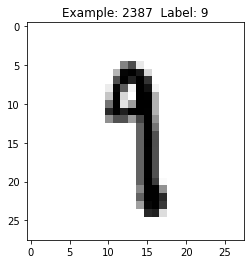

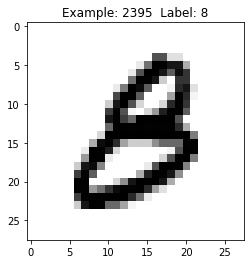

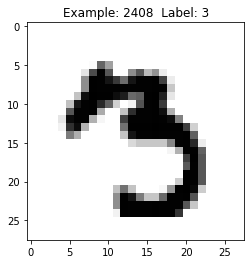

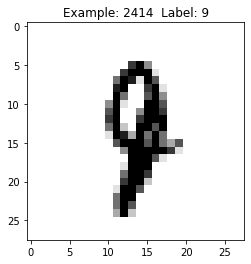

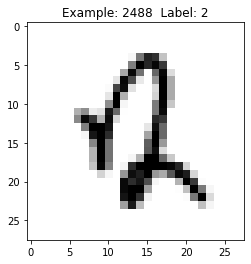

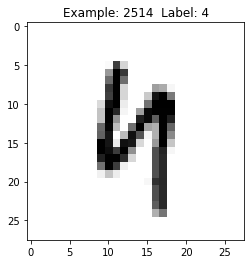

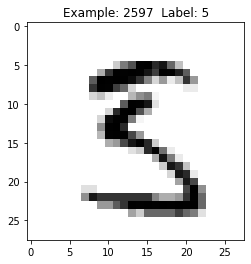

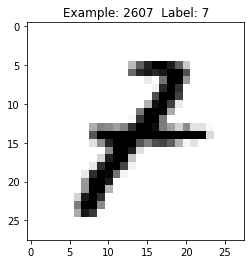

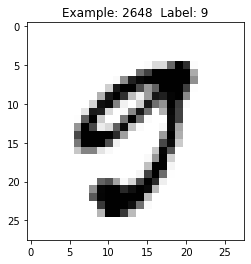

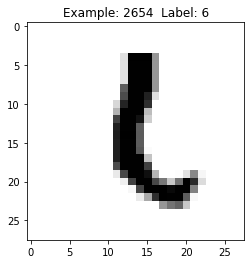

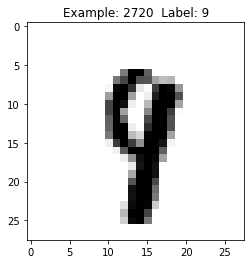

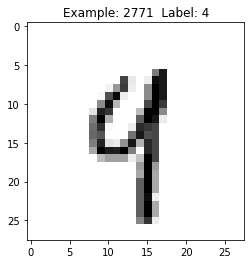

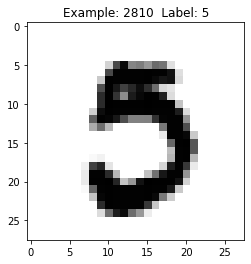

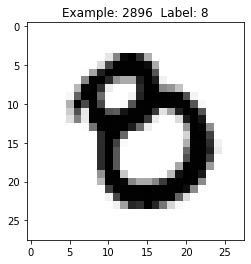

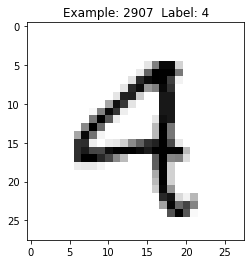

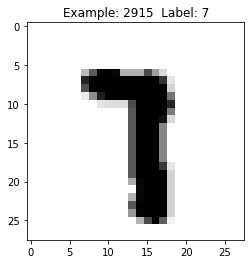

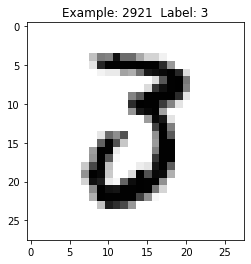

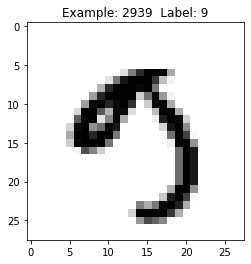

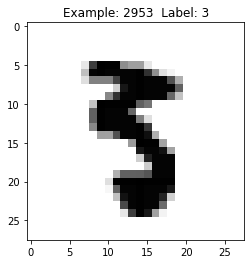

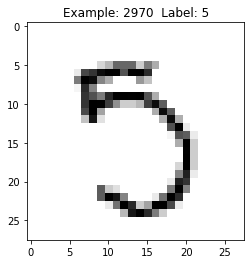

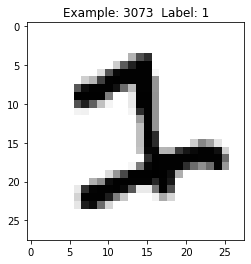

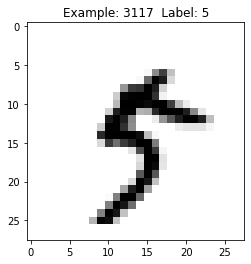

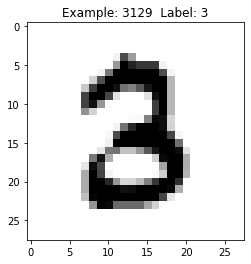

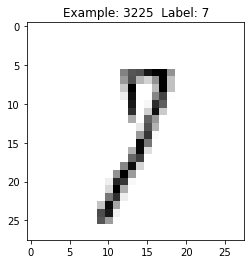

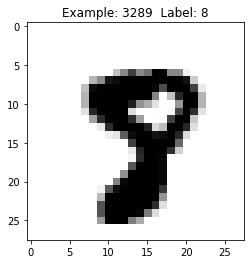

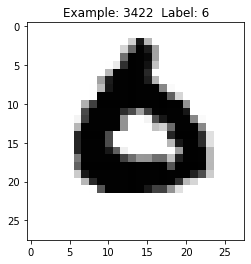

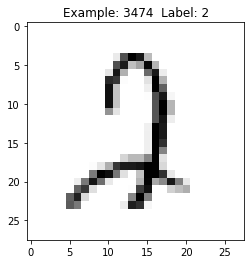

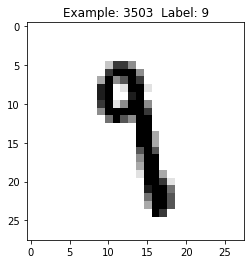

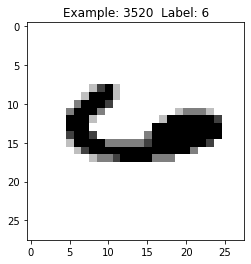

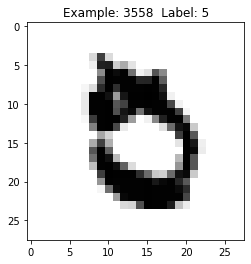

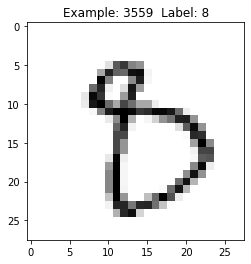

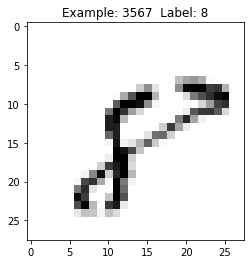

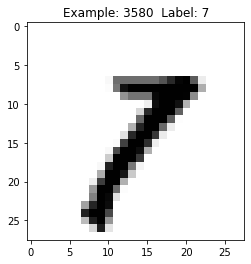

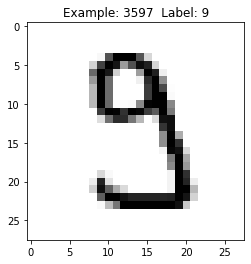

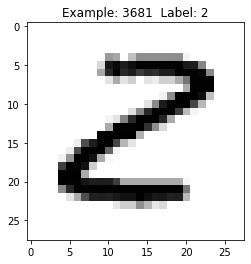

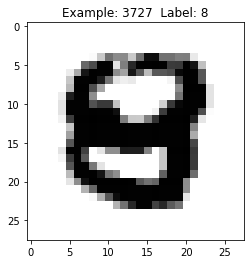

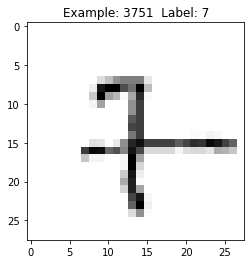

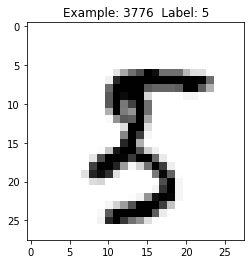

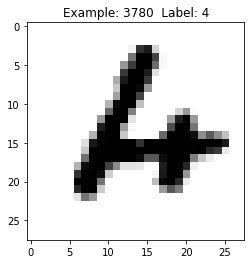

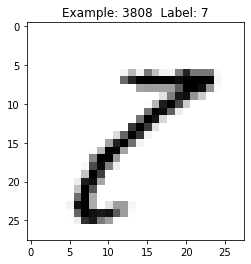

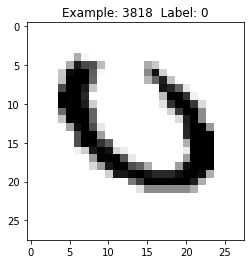

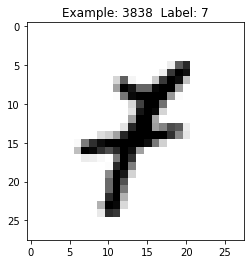

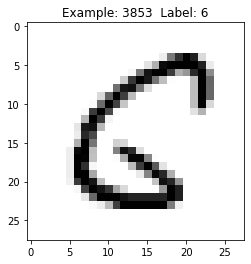

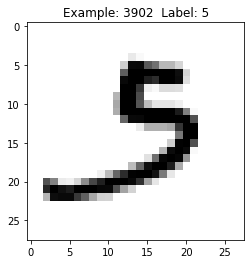

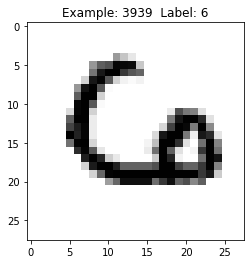

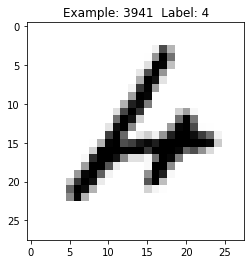

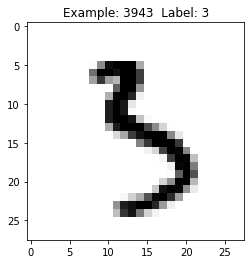

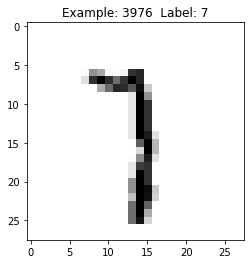

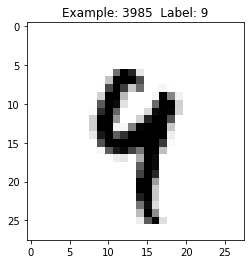

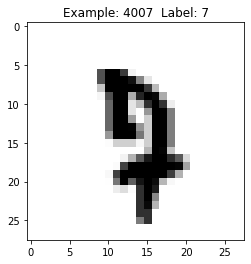

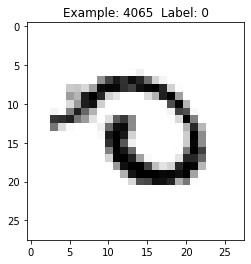

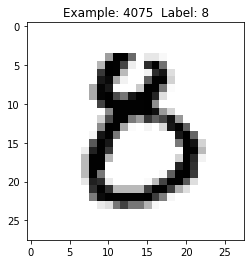

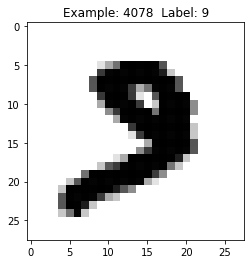

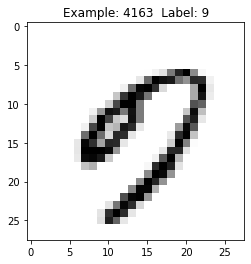

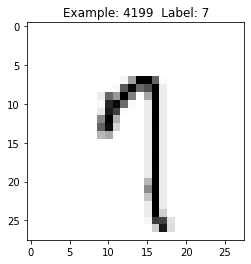

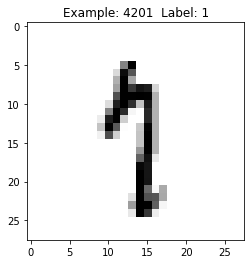

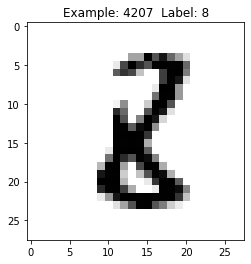

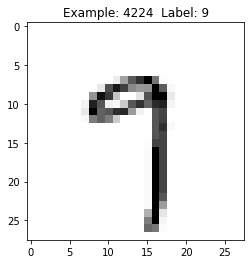

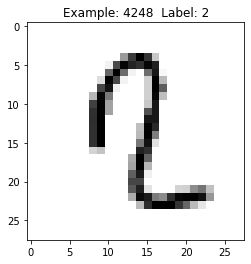

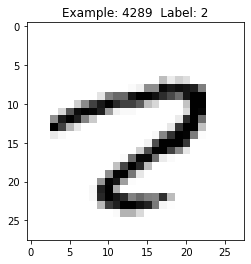

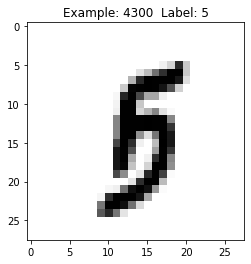

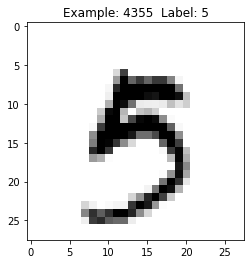

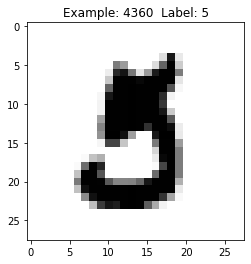

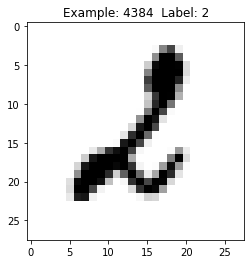

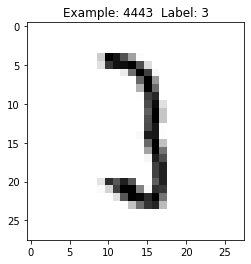

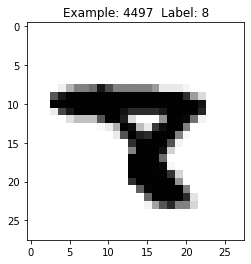

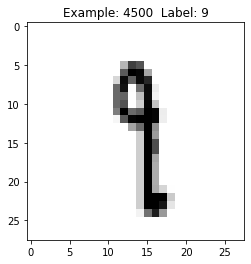

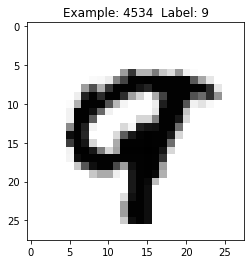

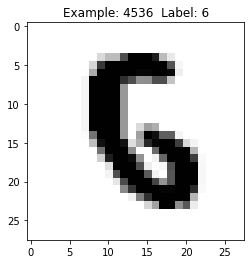

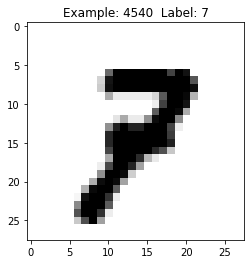

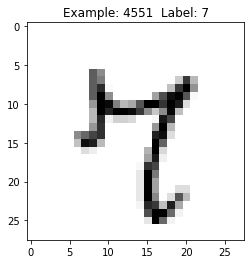

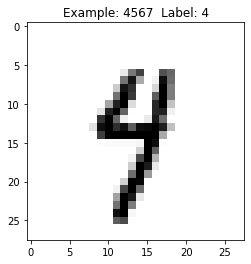

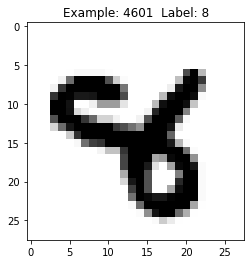

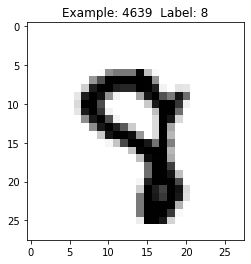

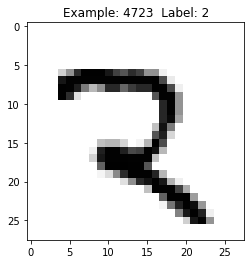

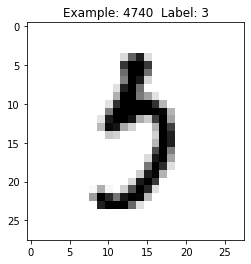

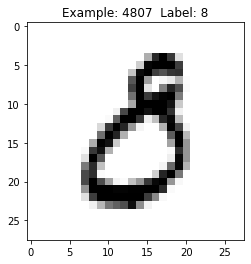

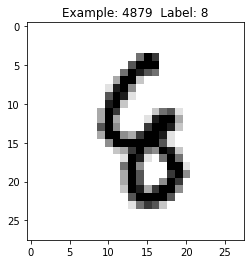

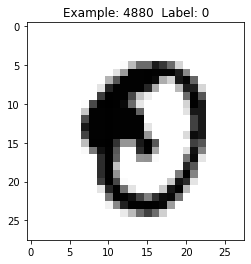

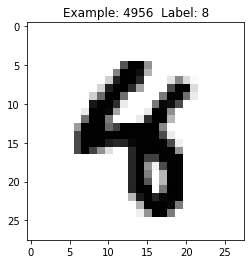

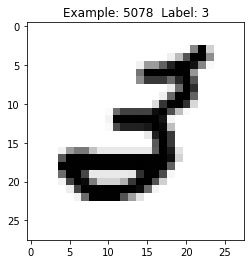

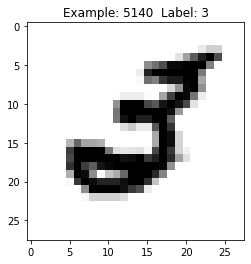

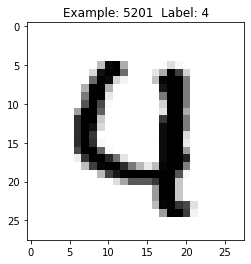

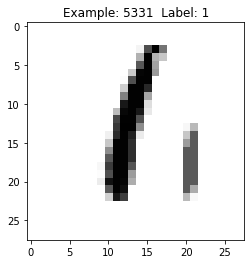

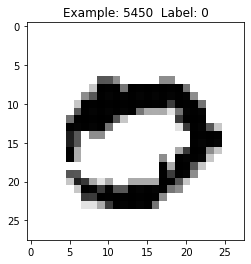

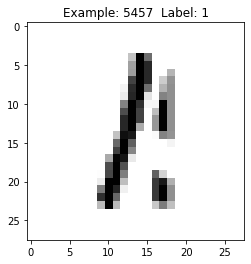

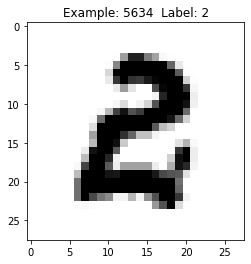

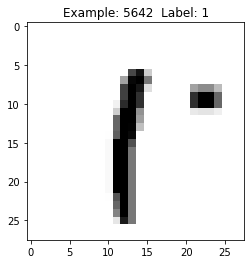

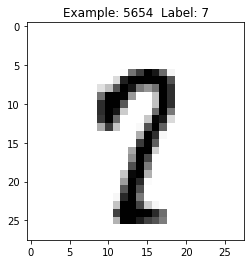

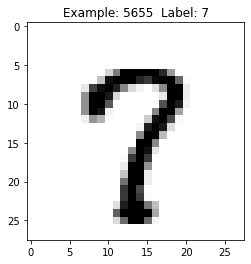

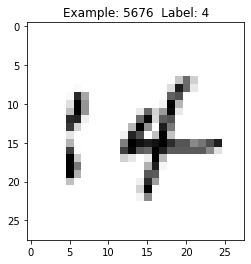

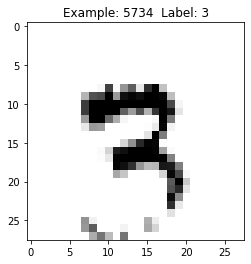

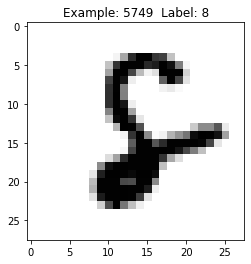

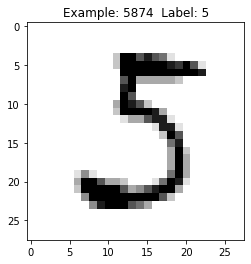

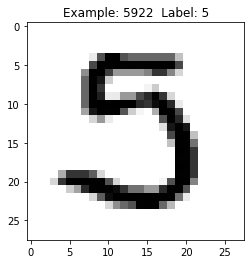

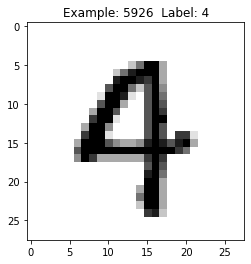

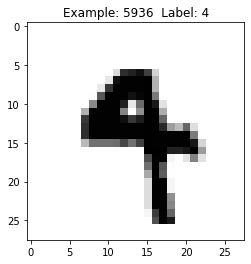

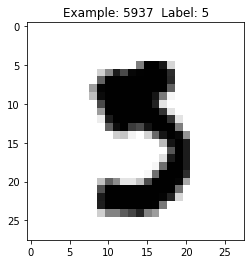

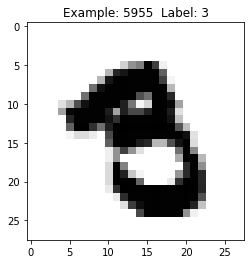

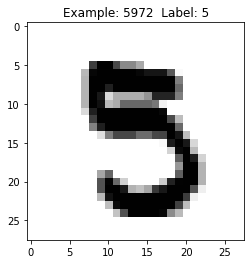

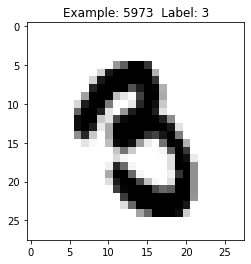

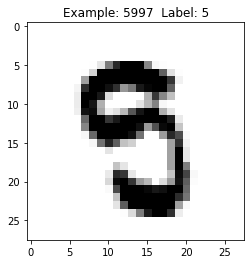

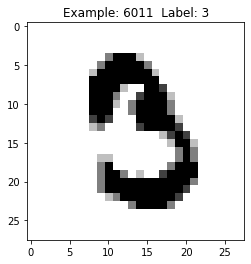

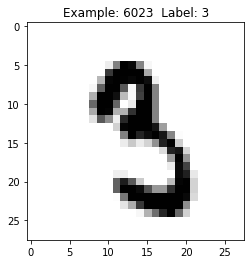

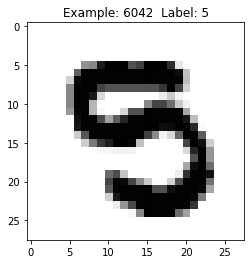

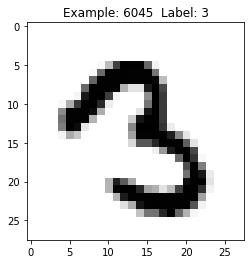

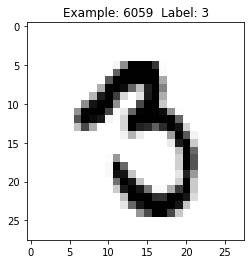

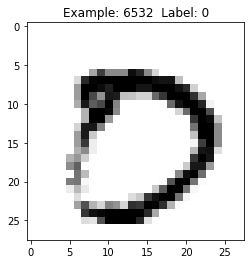

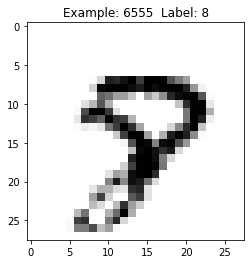

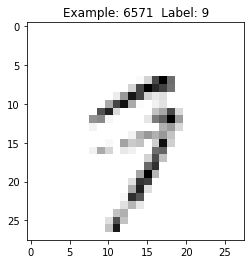

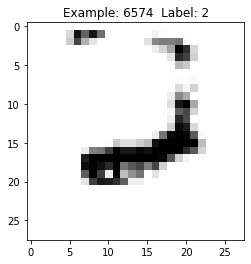

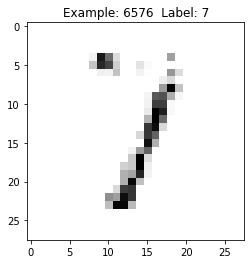

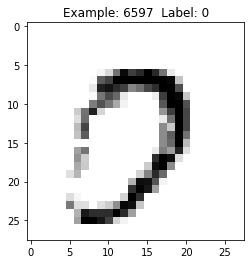

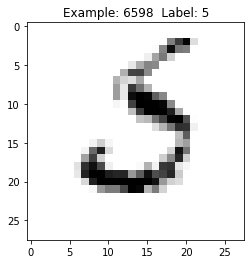

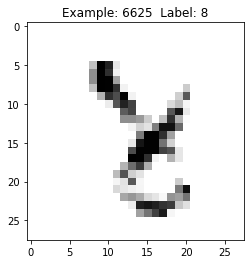

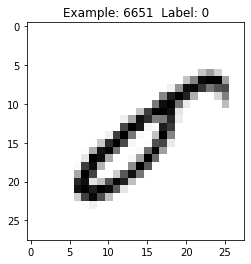

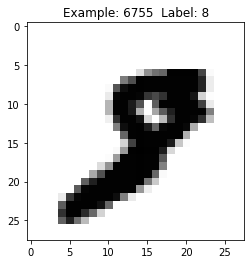

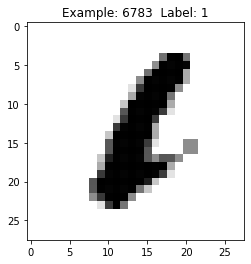

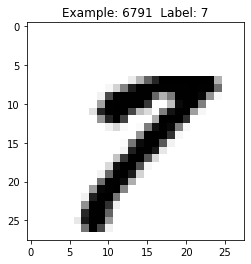

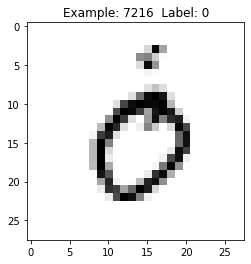

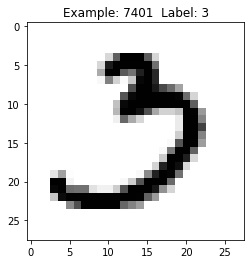

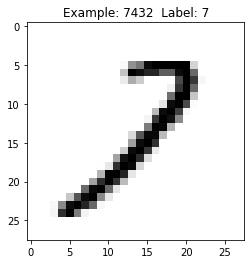

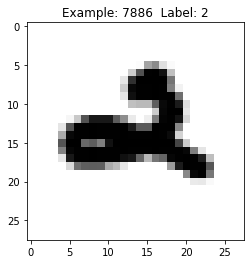

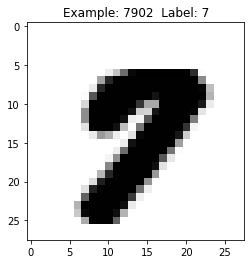

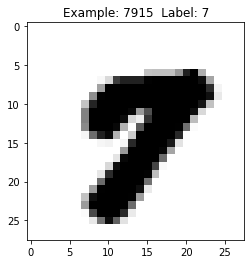

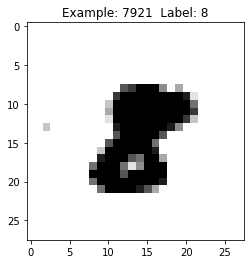

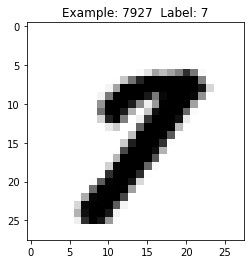

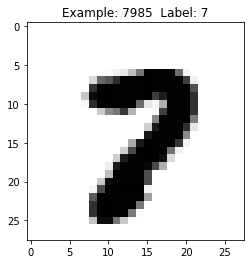

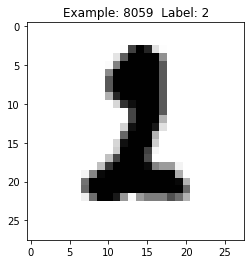

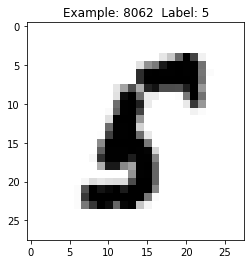

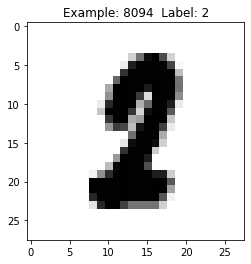

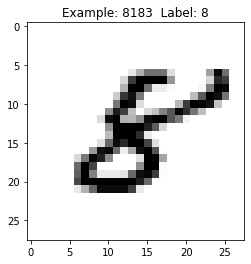

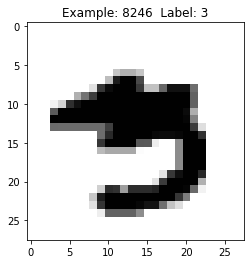

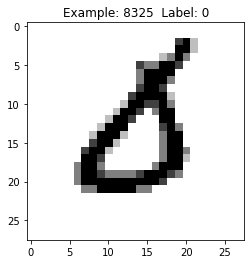

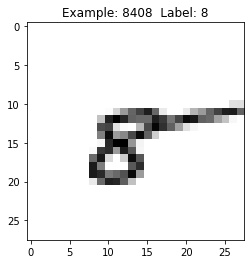

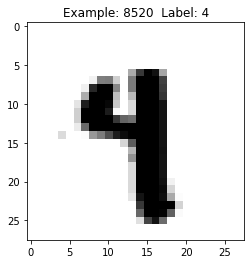

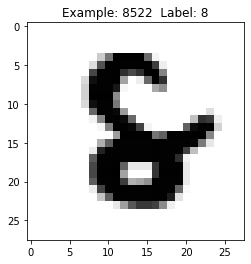

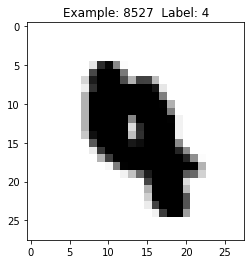

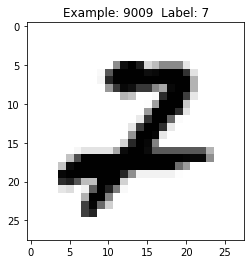

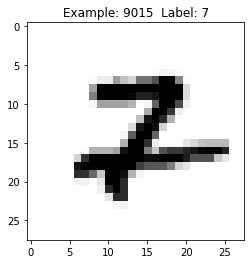

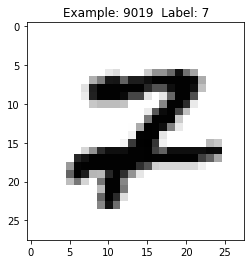

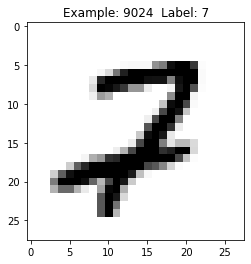

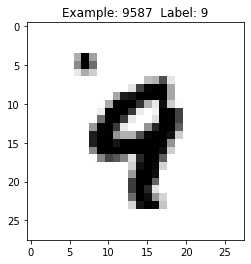

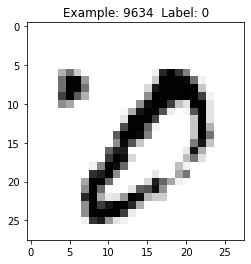

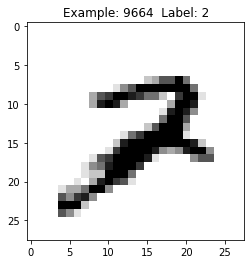

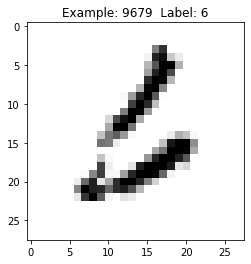

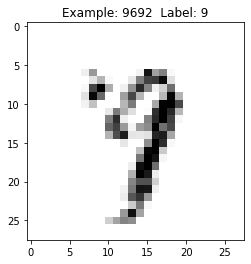

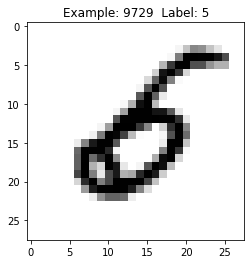

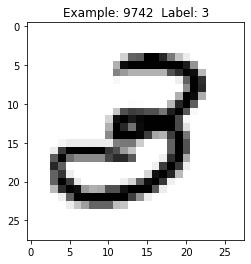

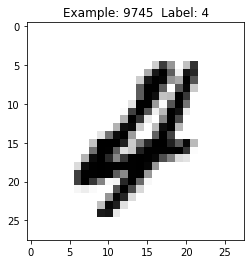

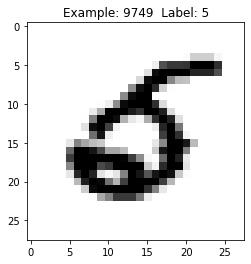

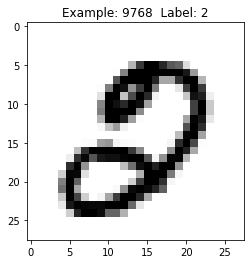

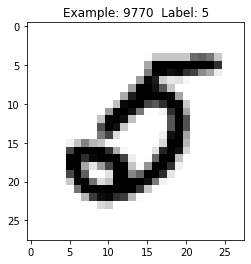

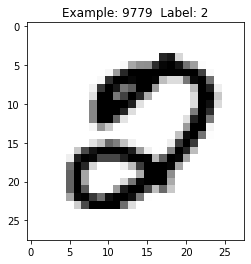

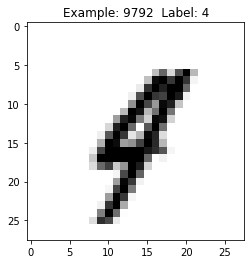

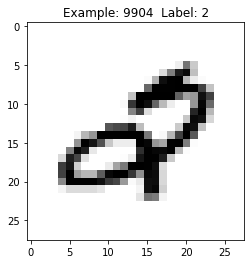

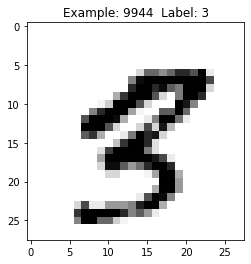

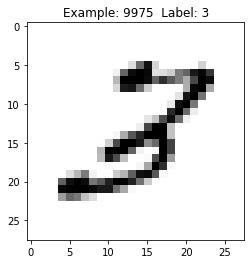

In [63]:
predictions = np.argmax(model.predict(x_test[:,:,:]), 1)
a = (predictions==y_test)
b = myarray(np.where(a,np.zeros((10000)), np.ones((10000))))
print(b.index(1)[0])
for i in b.index(1)[0]:
    display_digit(i)
    